In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas import concat
import tensorflow as tf
from tensorflow import keras
import time
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(215)
np.random.seed(215)

In [2]:
csv_path = "cuacabmkg.csv"
df = pd.read_csv(csv_path, parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')
df

,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE
TIMESTAMP,,,,,,
2020-01-01 00:00:00+00:00,0.46,26.8,0.0,0.0,88,1012.1
2020-01-01 01:00:00+00:00,0.40,28.0,0.0,0.0,81,1012.4
2020-01-01 02:00:00+00:00,0.35,28.8,0.0,0.0,79,1012.5
2020-01-01 03:00:00+00:00,0.35,29.2,310.0,3.0,78,1012.0
2020-01-01 04:00:00+00:00,0.39,30.0,0.0,0.0,75,1011.9
...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,0.10,25.2,280.0,2.0,91,1009.5
2022-12-31 20:00:00+00:00,0.04,24.8,310.0,1.0,92,1009.2
2022-12-31 21:00:00+00:00,0.03,24.6,0.0,0.0,92,1009.3


In [3]:
df.isna().sum()

RAINFALL     0
TEMP         0
WINDDIR      1
WINDSPEED    2
HUMIDITY     0
PRESSURE     0
dtype: int64

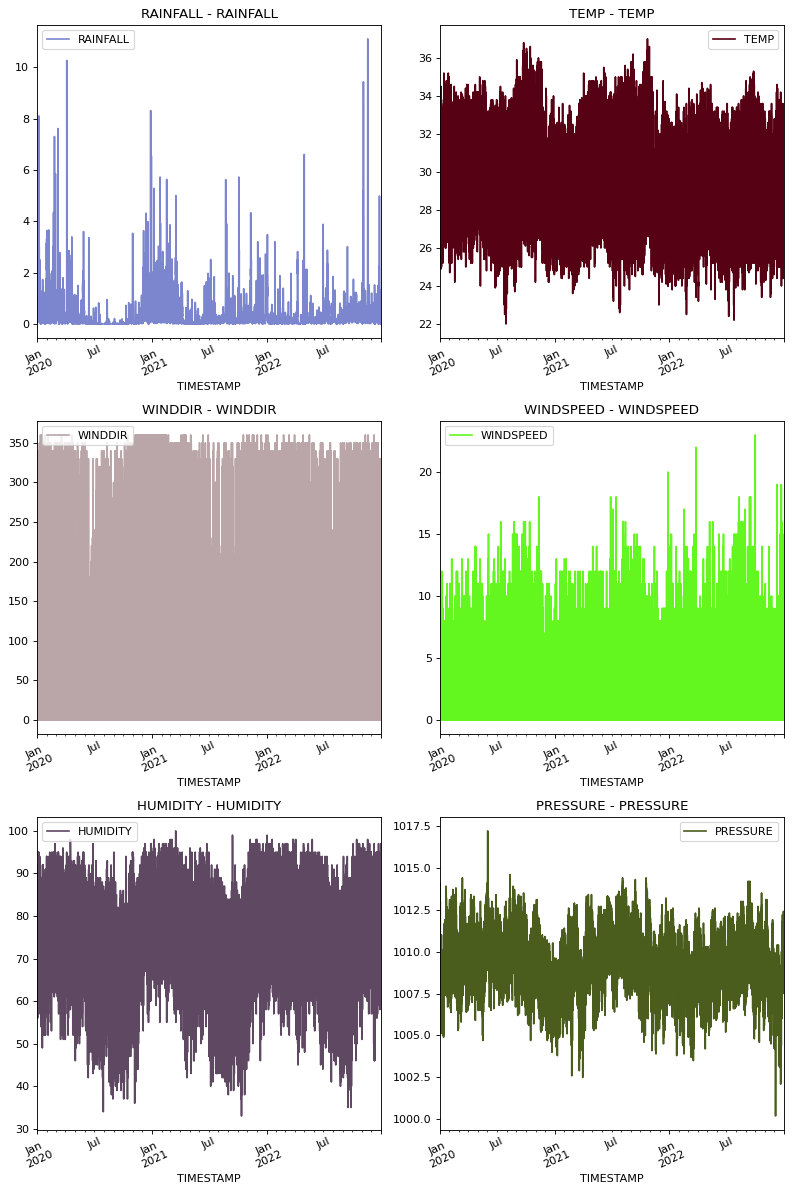

In [4]:
import random
def show_raw_visualization(data, rows=4):
    titles = list(data)
    feature_keys = list(data)
    #time_data = data[date_time_key]
    time_data = data.index
    fig, axes = plt.subplots(
        nrows=rows, ncols=2, figsize=(10, 15), dpi=80, facecolor="w", edgecolor="k"
        )
    for i in range(len(feature_keys)):
      key = feature_keys[i]
      c = random.random(), random.random(), random.random()
      t_data = data[key]
      t_data.index = time_data
      t_data.head()
      ax = t_data.plot(
          ax=axes[i // 2, i % 2],
          color=c,
          title="{} - {}".format(titles[i], key),
          rot=25,
          )
      ax.legend([titles[i]])
    plt.tight_layout()
show_raw_visualization(df, rows=3)

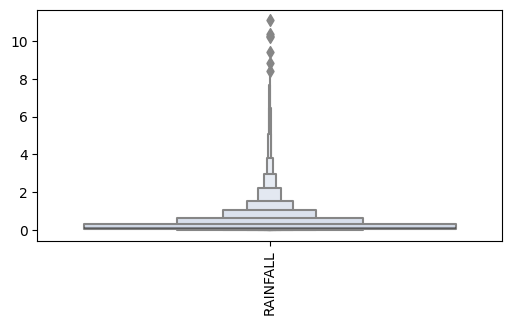

In [5]:
features = df
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(6,3))
sns.boxenplot(data = df[['RAINFALL']],palette = colours)
plt.xticks(rotation=90)
plt.show()

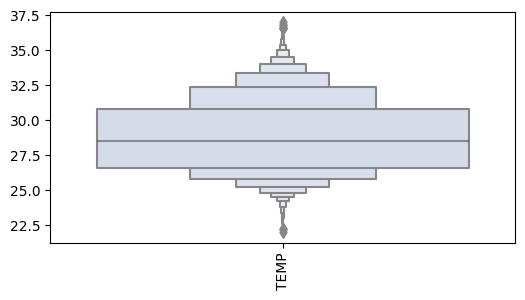

In [6]:
features = df
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(6,3))
sns.boxenplot(data = df[['TEMP']],palette = colours)
plt.xticks(rotation=90)
plt.show()

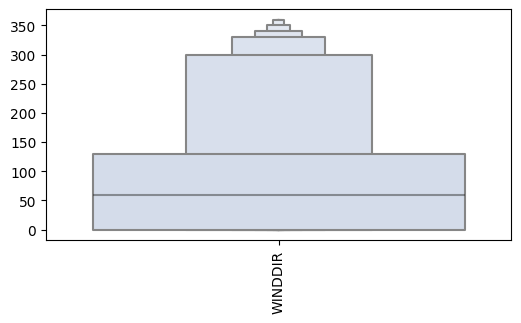

In [7]:
features = df
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(6,3))
sns.boxenplot(data = df[['WINDDIR']],palette = colours)
plt.xticks(rotation=90)
plt.show()

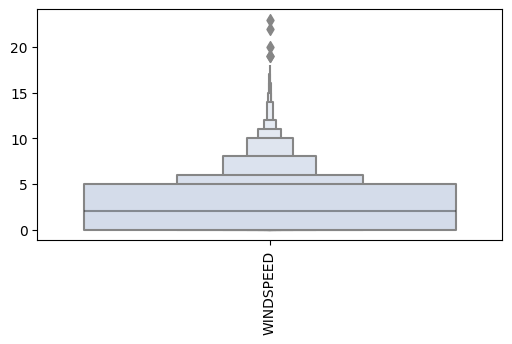

In [8]:
features = df
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(6,3))
sns.boxenplot(data = df[['WINDSPEED']],palette = colours)
plt.xticks(rotation=90)
plt.show()

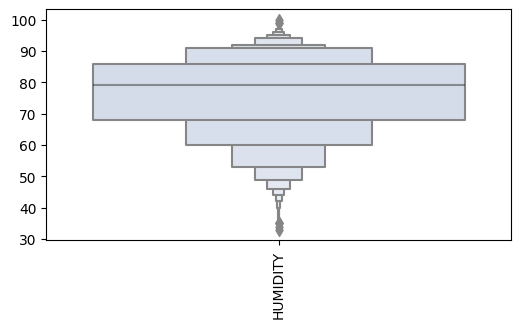

In [9]:
features = df
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(6,3))
sns.boxenplot(data = df[['HUMIDITY']],palette = colours)
plt.xticks(rotation=90)
plt.show()

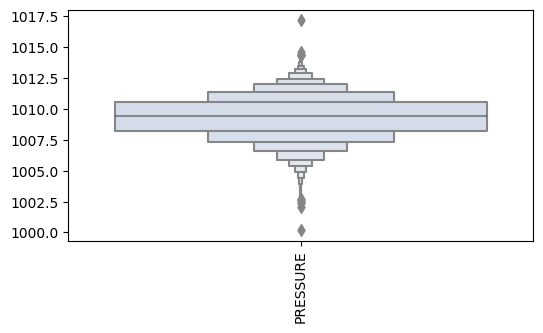

In [10]:
features = df
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(6,3))
sns.boxenplot(data = df[['PRESSURE']],palette = colours)
plt.xticks(rotation=90)
plt.show()

In [11]:
#memberikan nilai NaN pada data outlier jika data di atas threshold

def FilterRAINFALL(val):
  if val < 0 or val > 1000:
    val = np.NaN
  return val

def FilterTEMP(val):
  if val < 21 or val > 37:
    val = np.NaN
  return val

def FilterWINDDIR(val):
  if val <0 or val > 360:
    val = np.NaN
  return val

def FilterWINDSPEED(val):
  if val > 24:
    val = np.NaN
  return val

def FilterHUMIDITY(val):
  if val < 0 or val > 100:
    val = np.NaN
  return val

def FilterPRESSURE(val):
  if val < 1000 or val > 1018:
    val = np.NaN
  return val

df['RAINFALL'] = df.apply(lambda row : FilterRAINFALL(row['RAINFALL']), axis = 1)
df['TEMP'] = df.apply(lambda row : FilterTEMP(row['TEMP']), axis = 1)
df['WINDDIR'] = df.apply(lambda row : FilterWINDDIR(row['WINDDIR']), axis = 1)
df['WINDSPEED'] = df.apply(lambda row : FilterWINDSPEED(row['WINDSPEED']), axis = 1)
df['HUMIDITY'] = df.apply(lambda row : FilterHUMIDITY(row['HUMIDITY']), axis = 1)
df['PRESSURE'] = df.apply(lambda row : FilterPRESSURE(row['PRESSURE']), axis = 1)

In [12]:
df.isna().sum()

RAINFALL     0
TEMP         0
WINDDIR      1
WINDSPEED    2
HUMIDITY     0
PRESSURE     0
dtype: int64

In [13]:
df

,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE
TIMESTAMP,,,,,,
2020-01-01 00:00:00+00:00,0.46,26.8,0.0,0.0,88.0,1012.1
2020-01-01 01:00:00+00:00,0.40,28.0,0.0,0.0,81.0,1012.4
2020-01-01 02:00:00+00:00,0.35,28.8,0.0,0.0,79.0,1012.5
2020-01-01 03:00:00+00:00,0.35,29.2,310.0,3.0,78.0,1012.0
2020-01-01 04:00:00+00:00,0.39,30.0,0.0,0.0,75.0,1011.9
...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,0.10,25.2,280.0,2.0,91.0,1009.5
2022-12-31 20:00:00+00:00,0.04,24.8,310.0,1.0,92.0,1009.2
2022-12-31 21:00:00+00:00,0.03,24.6,0.0,0.0,92.0,1009.3


In [14]:
#resample rata-rata di jam dan hari yg sama pada semua tahun
dfl = df.groupby([df.index.month, df.index.day, df.index.hour], as_index=True).mean()

#mengisikan rata2 pada jam dan tanggal yg sama pada nilai NaN
for kolom in list(df):
  index = df.index[df[kolom].apply(np.isnan)]
  print(kolom)
  for num, val in enumerate(index):
    df.loc[val, kolom] = dfl.loc[index.month[num], index.day[num], index.hour[num]][kolom]

RAINFALL
TEMP
WINDDIR
WINDSPEED
HUMIDITY
PRESSURE


In [15]:
df.isna().sum()

RAINFALL     0
TEMP         0
WINDDIR      0
WINDSPEED    0
HUMIDITY     0
PRESSURE     0
dtype: int64

In [16]:
df

,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE
TIMESTAMP,,,,,,
2020-01-01 00:00:00+00:00,0.46,26.8,0.0,0.0,88.0,1012.1
2020-01-01 01:00:00+00:00,0.40,28.0,0.0,0.0,81.0,1012.4
2020-01-01 02:00:00+00:00,0.35,28.8,0.0,0.0,79.0,1012.5
2020-01-01 03:00:00+00:00,0.35,29.2,310.0,3.0,78.0,1012.0
2020-01-01 04:00:00+00:00,0.39,30.0,0.0,0.0,75.0,1011.9
...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,0.10,25.2,280.0,2.0,91.0,1009.5
2022-12-31 20:00:00+00:00,0.04,24.8,310.0,1.0,92.0,1009.2
2022-12-31 21:00:00+00:00,0.03,24.6,0.0,0.0,92.0,1009.3


<Axes: >

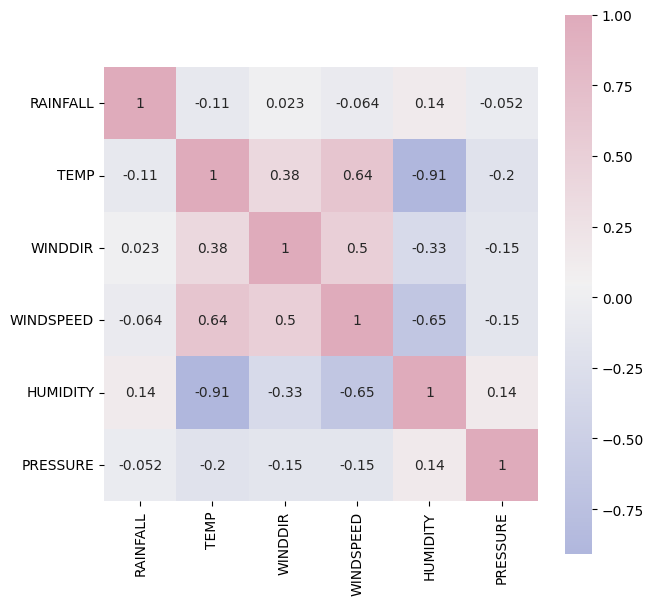

In [17]:
corrmat = df.corr(method='pearson')
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [18]:
hist_window = 3
horizon = 8
data = df

In [19]:
data

,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE
TIMESTAMP,,,,,,
2020-01-01 00:00:00+00:00,0.46,26.8,0.0,0.0,88.0,1012.1
2020-01-01 01:00:00+00:00,0.40,28.0,0.0,0.0,81.0,1012.4
2020-01-01 02:00:00+00:00,0.35,28.8,0.0,0.0,79.0,1012.5
2020-01-01 03:00:00+00:00,0.35,29.2,310.0,3.0,78.0,1012.0
2020-01-01 04:00:00+00:00,0.39,30.0,0.0,0.0,75.0,1011.9
...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,0.10,25.2,280.0,2.0,91.0,1009.5
2022-12-31 20:00:00+00:00,0.04,24.8,310.0,1.0,92.0,1009.2
2022-12-31 21:00:00+00:00,0.03,24.6,0.0,0.0,92.0,1009.3


In [20]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
dataX = x_scaler.fit_transform(data)
variabel = ['RAINFALL', 'TEMP', 'WINDDIR', 'WINDSPEED', 'HUMIDITY', 'PRESSURE']
# variabel = ['RAINFALL']
target = []
for i in range(horizon):
  target += variabel
dataY = y_scaler.fit_transform(data[target])

In [21]:
def deret_waktu_regresi(dataset, target, start, end, window, horizon):
  X = []
  y = []
  start = start + window
  if end is None:
    end = len(dataset) - horizon

  for i in range(start, end):
    indices = range(i-window, i)
    X.append(dataset[indices])

    #indicey = range(i+1, i+1+horizon)
    indicey = range(i, i+horizon)
    y.append(target[indicey])

  return np.array(X), np.array(y)

In [22]:
n = int(dataY.shape[1]/horizon)
TRAIN_SPLIT = int(len(data)*.8)

x_train_multi, y_train_multi = deret_waktu_regresi(
    dataX, dataY[:, :n], 0, TRAIN_SPLIT, hist_window, horizon)
x_test_multi, y_test_multi = deret_waktu_regresi(
    dataX, dataY[:, :n], TRAIN_SPLIT, None, hist_window, horizon)

In [23]:
output = y_train_multi.shape[2]*y_train_multi.shape[1]
y_train_multi = y_train_multi.reshape(-1, output, 1)
y_test_multi = y_test_multi.reshape(-1, output, 1)

In [24]:
output

48

In [25]:
TRAIN_SPLIT
# x_train_multi.shape[-2:]

21043

In [26]:
x_train_multi.shape
#x_test_multi.shape

(21040, 3, 6)

In [29]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = Sequential()
model.add(
    Bidirectional(
        LSTM(128, return_sequences=False), input_shape=x_train_multi.shape[-2:]
    )
)
# model.add(Bidirectional(LSTM(16, return_sequences=False)))
# model.add(Bidirectional(LSTM(16, return_sequences=False)))
model.add(
    Dense(512, activation="relu")
)  # activation = relu, sigmoid, tanh, prelu #fully connected layer
# dropout, weight decay
model.add(Dense(output, activation="relu"))
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="mse"
)  # loss = mae, huber #optimizer = Adam, AdamW
# learning_rate = 0.0001 [0.002, 0.001, 0.00015, 0.003]

es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=15, mode="min"
)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=15, verbose=1)
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath="model_checkpoint.keras",
    verbose=1,
    mode="min",
    save_weights_only=False,
    save_best_only=True,
)
history = model.fit(
    x_train_multi,
    y_train_multi,
    validation_data=(x_test_multi, y_test_multi),
    epochs=1000,
    batch_size=32,
    callbacks=[es_callback, reduce_lr, modelckpt_callback],
)

Epoch 1/1000
653/658 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821
Epoch 1: val_loss improved from inf to 0.04108, saving model to model_checkpoint.keras
658/658 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0819 - val_loss: 0.0411 - learning_rate: 1.0000e-04
Epoch 2/1000
657/658 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0414
Epoch 2: val_loss improved from 0.04108 to 0.03872, saving model to model_checkpoint.keras
658/658 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0414 - val_loss: 0.0387 - learning_rate: 1.0000e-04
Epoch 3/1000
655/658 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0394
Epoch 3: val_loss improved from 0.03872 to 0.02944, saving model to model_checkpoint.keras
658/658 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0394 - val_loss: 0.0294 - learning_rate: 1.0000e-04
Epoch 4/1000
651/658 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291
Epoch 4: val_loss improved from 0.02944 to 0.02232, saving model to model_checkpoint.keras
658/658 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0290

In [33]:
from keras import saving

# model.save('model/model.h5')
saving.save_model(model, 'model/my_model.keras')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               138240    
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dense_1 (Dense)             (None, 48)                24624     
                                                                 
Total params: 294448 (1.12 MB)
Trainable params: 294448 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


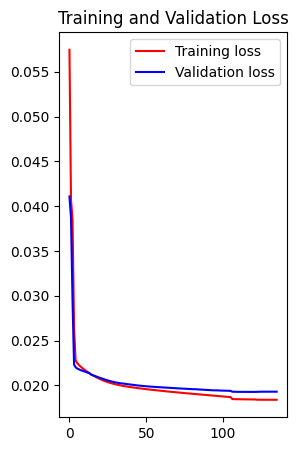

In [34]:
loss = history.history['loss']
epochs = range(len(loss))
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=1)

In [36]:
model.load_weights('./model/my_model.keras')

In [37]:
model.evaluate(x_train_multi, y_train_multi)

658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0185


0.018394717946648598

In [38]:
model.evaluate(x_test_multi, y_test_multi)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159


0.019301703199744225

In [39]:
x_train_multi.shape

(21040, 3, 6)

In [40]:
pred = model.predict(x_train_multi).reshape(-1, dataY.shape[1])
preds = y_scaler.inverse_transform(pred)
pd.DataFrame(preds, columns=target)

658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE,RAINFALL,TEMP,WINDDIR,WINDSPEED,...,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE
0,0.337995,29.819487,132.679367,1.754033,75.060043,1012.186157,0.356382,30.830597,165.717773,3.294975,...,172.702133,3.974226,70.786514,1009.106812,0.458411,30.069695,159.628601,3.627921,74.056511,1009.477173
1,0.353399,30.163033,206.322815,3.020813,73.506264,1011.134094,0.439267,30.489277,198.079758,3.259793,...,129.360214,1.907528,80.799805,1009.557373,0.566656,27.716501,109.144363,1.517094,82.607803,1010.282654
2,0.371140,31.087822,151.276840,2.409708,70.793625,1011.086609,0.344974,31.455328,181.105988,2.988078,...,133.867523,2.170521,78.071381,1009.754028,0.364355,28.641613,101.624641,1.667212,80.250366,1010.519348
3,0.496234,31.742727,256.794830,5.066122,66.495232,1009.801025,0.529030,31.855324,235.890884,5.250346,...,118.002167,1.866479,81.176964,1009.447998,0.572625,27.601288,81.096558,0.817182,84.418594,1010.289551
4,0.576504,32.217045,257.160553,4.787456,64.458839,1009.070312,0.613907,31.874950,250.703262,4.923998,...,99.801979,1.462263,82.477745,1010.173584,0.646683,27.685482,65.145660,0.903409,84.309654,1010.924683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21035,0.186862,23.836649,24.902691,0.000000,92.767349,1011.738708,0.120833,24.989910,39.437256,0.333462,...,82.020676,1.971949,79.019791,1009.337830,0.000000,27.740274,83.706612,2.201629,79.357048,1009.478577
21036,0.115042,24.490915,72.016205,1.667329,87.725380,1011.328491,0.019826,25.548557,32.089161,1.663162,...,47.728836,3.755385,75.681549,1010.050476,0.000000,28.534092,60.193554,3.712362,74.102158,1010.002930
21037,0.008456,23.971111,0.000000,0.045140,90.228378,1009.976624,0.000000,24.259081,0.000000,0.177162,...,39.789860,2.097217,86.020569,1010.445557,0.000000,27.018906,54.745319,2.207502,83.556900,1010.573120
21038,0.000000,23.291773,0.000000,0.000000,93.689590,1009.175476,0.000000,23.289194,0.000000,0.000000,...,33.491386,1.481575,88.776695,1010.744873,0.000000,26.977468,56.062611,1.628436,83.972267,1010.578186


In [41]:
asli = y_train_multi.reshape(-1, dataY.shape[1])
aslis = y_scaler.inverse_transform(asli)

In [42]:
pred = model.predict(x_test_multi).reshape(-1, dataY.shape[1])
preds = y_scaler.inverse_transform(pred)
pd.DataFrame(preds, columns=target)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE,RAINFALL,TEMP,WINDDIR,WINDSPEED,...,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE,RAINFALL,TEMP,WINDDIR,WINDSPEED,HUMIDITY,PRESSURE
0,0.000000,24.066866,0.000000,0.000000,93.778229,1006.861450,0.003065,24.332296,0.000000,0.000000,...,151.371765,2.063001,75.031654,1008.651978,0.000000,29.465143,184.735565,2.483177,71.702087,1008.150696
1,0.000000,25.991570,44.009079,2.586879,86.849854,1008.140991,0.149525,26.898376,58.138565,2.144961,...,206.811813,5.326939,66.524483,1007.614868,0.000000,31.641533,206.772186,5.166263,65.917458,1006.966125
2,0.161570,26.348680,52.931889,2.436409,86.751717,1008.552490,0.092496,27.607174,61.493942,2.425578,...,154.557129,4.142891,76.674690,1006.385864,0.041598,28.863873,148.086029,3.732820,77.415001,1006.222412
3,0.274420,26.562374,51.673981,1.214122,89.990463,1009.792480,0.124843,27.356857,53.835953,1.781528,...,79.999077,1.548318,87.815475,1006.529602,0.326695,25.937033,69.044594,1.166098,90.502884,1006.392029
4,0.140195,29.206280,83.813377,1.725716,77.076660,1010.417358,0.148676,30.458467,144.447235,2.699951,...,176.248718,3.607068,74.081169,1006.064575,0.335054,28.585093,150.732880,2.844279,78.398293,1006.216309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0.563501,26.529203,149.621872,2.516626,83.168129,1008.966492,0.548597,26.284695,107.780899,1.761305,...,79.872429,0.741224,86.824265,1009.130249,0.564501,26.340225,82.824142,1.269737,85.274666,1009.081299
5246,0.578045,26.069845,119.484566,1.447593,85.708000,1009.787354,0.530230,25.849133,88.427338,1.081156,...,60.038975,0.000000,88.782013,1008.634521,0.566176,25.818573,63.589371,0.265334,87.711113,1008.675354
5247,0.636181,25.689447,110.964630,1.038161,89.063820,1010.620117,0.638477,25.729029,86.329811,0.648962,...,51.868973,0.000000,89.824043,1008.601868,0.673996,25.674139,54.508934,0.000000,89.559418,1008.731079
5248,0.558000,25.701183,27.516493,0.360976,89.378464,1011.307739,0.579899,26.152540,47.835236,0.103209,...,52.623417,0.837105,83.796059,1008.583252,1.000304,27.009432,46.058689,0.180516,84.984146,1008.690125


In [43]:
asli = y_test_multi.reshape(-1, dataY.shape[1])
aslis = y_scaler.inverse_transform(asli)

In [44]:
pd.DataFrame(aslis)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.07,25.1,90.0,5.0,92.0,1007.1,0.11,25.0,70.0,3.0,...,280.0,4.0,72.0,1010.6,0.72,30.4,320.0,5.0,74.0,1009.8
1,0.11,25.0,70.0,3.0,92.0,1008.0,0.14,25.6,0.0,0.0,...,320.0,5.0,74.0,1009.8,0.79,30.6,340.0,7.0,73.0,1008.6
2,0.14,25.6,0.0,0.0,94.0,1009.2,0.22,27.2,0.0,0.0,...,340.0,7.0,73.0,1008.6,0.80,30.0,310.0,5.0,78.0,1008.0
3,0.22,27.2,0.0,0.0,84.0,1010.3,0.36,27.6,0.0,0.0,...,310.0,5.0,78.0,1008.0,0.70,28.0,130.0,6.0,91.0,1008.1
4,0.36,27.6,0.0,0.0,84.0,1011.0,0.49,29.8,290.0,3.0,...,130.0,6.0,91.0,1008.1,0.57,27.2,100.0,7.0,88.0,1008.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0.50,26.4,260.0,2.0,83.0,1009.7,0.51,26.0,280.0,2.0,...,0.0,0.0,90.0,1010.4,0.16,25.4,290.0,6.0,89.0,1009.8
5246,0.51,26.0,280.0,2.0,88.0,1010.5,0.48,25.8,0.0,0.0,...,290.0,6.0,89.0,1009.8,0.10,25.2,280.0,2.0,91.0,1009.5
5247,0.48,25.8,0.0,0.0,89.0,1011.1,0.40,25.6,0.0,0.0,...,280.0,2.0,91.0,1009.5,0.04,24.8,310.0,1.0,92.0,1009.2
5248,0.40,25.6,0.0,0.0,91.0,1011.3,0.36,25.4,0.0,0.0,...,310.0,1.0,92.0,1009.2,0.03,24.6,0.0,0.0,92.0,1009.3


In [45]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
  return round(np.sqrt(metrics.mean_squared_error(y_true, y_pred)), 2)
 #  mape, r2, mae

variabel = ['RAINFALL', 'TEMP', 'WINDDIR', 'WINDSPEED', 'HUMIDITY', 'PRESSURE']
# variabel = ['RAINFALL']
arr_RAINFALL = []
arr_TEMP = []
arr_WINDDIR = []
arr_WINDSPEED = []
arr_HUMIDITY = []
arr_PRESSURE = []


for var in [i for i in range(0,len(target),len(variabel))]:
  arr_RAINFALL.append(timeseries_evaluation_metrics_func(aslis[:,var], preds[:,var]))
  arr_TEMP.append(timeseries_evaluation_metrics_func(aslis[:,var+1], preds[:,var+1]))
  arr_WINDDIR.append(timeseries_evaluation_metrics_func(aslis[:,var+2], preds[:,var+2]))
  arr_WINDSPEED.append(timeseries_evaluation_metrics_func(aslis[:,var+3], preds[:,var+3]))
  arr_HUMIDITY.append(timeseries_evaluation_metrics_func(aslis[:,var+4], preds[:,var+4]))
  arr_PRESSURE.append(timeseries_evaluation_metrics_func(aslis[:,var+5], preds[:,var+5]))


pd.set_option("display.precision", 2)
pd.DataFrame([arr_RAINFALL, arr_TEMP, arr_WINDDIR, arr_WINDSPEED, arr_HUMIDITY, arr_PRESSURE]).T.style.hide(axis='index')
# pd.DataFrame([arr_RAINFALL]).T.style.hide_index()

0,1,2,3,4,5
0.200000,0.690000,86.390000,2.120000,3.620000,0.430000
0.320000,1.060000,93.800000,2.340000,5.250000,0.670000
0.410000,1.340000,97.790000,2.510000,6.410000,0.900000
0.490000,1.550000,100.590000,2.640000,7.350000,1.070000
0.550000,1.730000,102.060000,2.720000,8.070000,1.130000
0.590000,1.860000,102.790000,2.810000,8.600000,1.100000
0.600000,1.910000,102.870000,2.850000,8.850000,1.000000
0.620000,1.870000,102.230000,2.850000,8.770000,0.900000


In [47]:
from sklearn.metrics import r2_score

def timeseries_evaluation_metrics_func(y_true, y_pred):
    r_squared = r2_score(y_true, y_pred)
    return round(r_squared, 2)

variabel = ['RAINFALL', 'TEMP', 'WINDDIR', 'WINDSPEED', 'HUMIDITY', 'PRESSURE']
# variabel = ['RAINFALL']
arr_RAINFALL = []
arr_TEMP = []
arr_WINDDIR = []
arr_WINDSPEED = []
arr_HUMIDITY = []
arr_PRESSURE = []


for var in [i for i in range(0,len(target),len(variabel))]:
  arr_RAINFALL.append(timeseries_evaluation_metrics_func(aslis[:,var], preds[:,var]))
  arr_TEMP.append(timeseries_evaluation_metrics_func(aslis[:,var+1], preds[:,var+1]))
  arr_WINDDIR.append(timeseries_evaluation_metrics_func(aslis[:,var+2], preds[:,var+2]))
  arr_WINDSPEED.append(timeseries_evaluation_metrics_func(aslis[:,var+3], preds[:,var+3]))
  arr_HUMIDITY.append(timeseries_evaluation_metrics_func(aslis[:,var+4], preds[:,var+4]))
  arr_PRESSURE.append(timeseries_evaluation_metrics_func(aslis[:,var+5], preds[:,var+5]))


pd.set_option("display.precision", 2)
pd.DataFrame([arr_RAINFALL, arr_TEMP, arr_WINDDIR, arr_WINDSPEED, arr_HUMIDITY, arr_PRESSURE]).T.style.hide(axis='index')
# pd.DataFrame([arr_RAINFALL]).T.style.hide_index()

0,1,2,3,4,5
0.910000,0.930000,0.400000,0.620000,0.920000,0.930000
0.750000,0.820000,0.290000,0.540000,0.830000,0.840000
0.590000,0.720000,0.230000,0.470000,0.750000,0.720000
0.420000,0.630000,0.180000,0.420000,0.670000,0.600000
0.270000,0.530000,0.160000,0.380000,0.600000,0.550000
0.160000,0.460000,0.150000,0.340000,0.550000,0.580000
0.110000,0.430000,0.140000,0.320000,0.520000,0.650000
0.070000,0.460000,0.150000,0.320000,0.530000,0.720000


Text(0.5, 1.0, 'BiLSTM')

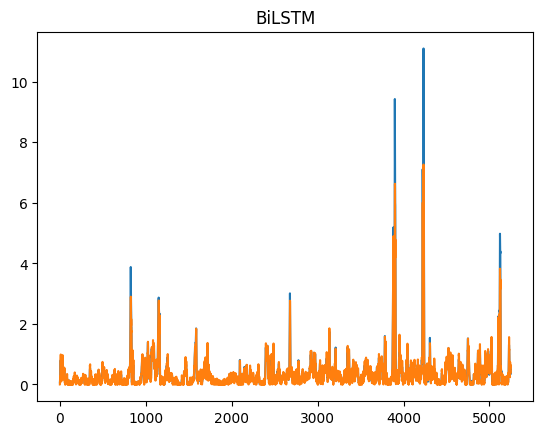

In [48]:
pd.DataFrame(aslis).iloc[:, 0].plot(label='Actual')
pd.DataFrame(preds).iloc[:, 0].plot(label='Predicted')

# plt.xlabel('Data')  # Nama sumbu X
# plt.ylabel('Value')  # Nama sumbu Y
plt.title('BiLSTM')  # Judul plot